In [1]:
import os
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
# LOAD FILE

In [3]:
green_acc = pd.read_csv("Data_firstclean/green_lsoa.csv",low_memory=False)

In [4]:
green_acc.head()

,lsoa11,blue_dist,green_pas,green_act
0,E01000001,2.387111,0.046221,0.295
1,E01000002,2.048814,0.041072,0.320
2,E01000003,1.217941,0.050611,0.200
3,E01000005,1.181282,0.044282,0.140
4,E01000006,1.760714,0.527459,0.585


In [5]:
other = pd.read_csv("Data_firstclean/other_factors2.csv",low_memory=False)
other.head()

,Area_code,Area_name,obesity(age18+),respiratory,coronary,TB_incidence,Active,Females,Populationdensity,housingprice,...,65+(100%),All_persons,total_cases,ln_total_cases,total_cases2,covid0_60,covid+60,total_case_rate,infection_tate(60-),infection_tate(60+)
0,E09000002,Barking and Dagenham,64.5155,133.0534,104.4367,20.6100,0.519,0.513476,6064.0,300000.0,...,0.086798,218900,71600,11.178850,27327,65036.0,6633.0,32.708999,34.050262,24.032533
1,E09000003,Barnet,61.1233,77.4378,88.5450,13.3525,0.616,0.516054,4487.0,533500.0,...,0.144105,389300,132459,11.794028,51285,115297.0,17370.0,34.024917,36.707100,23.098360
2,E09000004,Bexley,64.6095,88.3333,90.9369,8.8988,0.524,0.519270,4069.0,342500.0,...,0.166329,246500,85071,11.351241,35010,72806.0,12377.0,34.511562,37.939552,22.668429
3,E09000005,Brent,55.8951,72.4171,103.4684,32.5362,0.557,0.509417,7859.0,499950.0,...,0.116245,339800,106510,11.575994,40930,93742.0,12837.0,31.344909,33.019373,22.964174
4,E09000006,Bromley,58.0292,83.4814,80.1178,5.2376,0.683,0.520303,2198.0,440000.0,...,0.176667,330000,114402,11.647474,47084,98314.0,16263.0,34.667273,38.782643,21.231022


<AxesSubplot:>

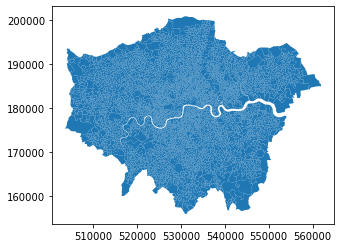

In [6]:
#lSOA Shapefile 
lsoas = gpd.read_file('statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp')
lsoas.plot()

In [7]:
lsoa_greenacc = pd.merge(lsoas, green_acc, left_on='LSOA11CD', right_on='lsoa11', how='left')
print(lsoa_greenacc.shape)
lsoa_greenacc

(4835, 19)


,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,lsoa11,blue_dist,green_pas,green_act
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.230, 532162.491 18...",E01000001,2.387111,0.046221,0.295
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18...",E01000002,2.048814,0.041072,0.320
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.250 18...",E01000003,1.217941,0.050611,0.200
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.770, 533649.063 18...",E01000005,1.181282,0.044282,0.140
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18...",E01000006,1.760714,0.527459,0.585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033742,Greenwich 007F,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1352,1352,0,107.6,581,2.3,"POLYGON ((544642.680 179824.674, 544766.313 17...",E01033742,0.185333,0.039919,0.880
4831,E01033743,Greenwich 002H,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,2038,2038,0,20.4,663,3.1,"POLYGON ((546579.195 181097.813, 546687.036 18...",E01033743,0.634500,0.067162,0.955
4832,E01033744,Greenwich 007G,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1845,1728,117,125.8,646,2.7,"POLYGON ((544536.486 179447.115, 544602.630 17...",E01033744,0.273226,0.015671,0.600
4833,E01033745,Greenwich 002I,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,1820,1820,0,32.3,591,3.1,"POLYGON ((546415.745 180152.270, 546320.715 18...",E01033745,0.537037,0.104303,1.090


In [8]:
boro_green2 = lsoa_greenacc.groupby(['LAD11CD'],as_index=False)['blue_dist','green_act','green_pas'].median()

/tmp/ipykernel_814/1964027884.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  boro_green2 = lsoa_greenacc.groupby(['LAD11CD'],as_index=False)['blue_dist','green_act','green_pas'].median()


In [9]:
boro_green2.head()

,LAD11CD,blue_dist,green_act,green_pas
0,E09000001,1.199612,0.3075,0.045252
1,E09000002,1.324479,0.3800,0.706887
2,E09000003,3.113437,0.4400,0.611714
3,E09000004,2.064403,0.4775,0.363154
4,E09000005,2.081429,0.3800,0.470558


In [10]:
#add green space with borough file
boro_xy = pd.merge(other, boro_green2, left_on='Area_code', right_on='LAD11CD', how='inner')
print(boro_xy.shape)
boro_xy.head()

(32, 25)


,Area_code,Area_name,obesity(age18+),respiratory,coronary,TB_incidence,Active,Females,Populationdensity,housingprice,...,total_cases2,covid0_60,covid+60,total_case_rate,infection_tate(60-),infection_tate(60+),LAD11CD,blue_dist,green_act,green_pas
0,E09000002,Barking and Dagenham,64.5155,133.0534,104.4367,20.6100,0.519,0.513476,6064.0,300000.0,...,27327,65036.0,6633.0,32.708999,34.050262,24.032533,E09000002,1.324479,0.3800,0.706887
1,E09000003,Barnet,61.1233,77.4378,88.5450,13.3525,0.616,0.516054,4487.0,533500.0,...,51285,115297.0,17370.0,34.024917,36.707100,23.098360,E09000003,3.113437,0.4400,0.611714
2,E09000004,Bexley,64.6095,88.3333,90.9369,8.8988,0.524,0.519270,4069.0,342500.0,...,35010,72806.0,12377.0,34.511562,37.939552,22.668429,E09000004,2.064403,0.4775,0.363154
3,E09000005,Brent,55.8951,72.4171,103.4684,32.5362,0.557,0.509417,7859.0,499950.0,...,40930,93742.0,12837.0,31.344909,33.019373,22.964174,E09000005,2.081429,0.3800,0.470558
4,E09000006,Bromley,58.0292,83.4814,80.1178,5.2376,0.683,0.520303,2198.0,440000.0,...,47084,98314.0,16263.0,34.667273,38.782643,21.231022,E09000006,2.637000,0.4700,0.478473


In [11]:
boro_xy.drop(["Area_name","LAD11CD"],axis=1, inplace=True)

In [12]:
boro_xy=boro_xy.set_index("Area_code", drop=True, append=False, inplace=False, verify_integrity=False)

In [13]:
boro_xy.head()

,obesity(age18+),respiratory,coronary,TB_incidence,Active,Females,Populationdensity,housingprice,income,65+(100%),...,ln_total_cases,total_cases2,covid0_60,covid+60,total_case_rate,infection_tate(60-),infection_tate(60+),blue_dist,green_act,green_pas
Area_code,,,,,,,,,,,,,,,,,,,,,
E09000002,64.5155,133.0534,104.4367,20.6100,0.519,0.513476,6064.0,300000.0,500.4,0.086798,...,11.178850,27327,65036.0,6633.0,32.708999,34.050262,24.032533,1.324479,0.3800,0.706887
E09000003,61.1233,77.4378,88.5450,13.3525,0.616,0.516054,4487.0,533500.0,520.2,0.144105,...,11.794028,51285,115297.0,17370.0,34.024917,36.707100,23.098360,3.113437,0.4400,0.611714
E09000004,64.6095,88.3333,90.9369,8.8988,0.524,0.519270,4069.0,342500.0,568.3,0.166329,...,11.351241,35010,72806.0,12377.0,34.511562,37.939552,22.668429,2.064403,0.4775,0.363154
E09000005,55.8951,72.4171,103.4684,32.5362,0.557,0.509417,7859.0,499950.0,540.7,0.116245,...,11.575994,40930,93742.0,12837.0,31.344909,33.019373,22.964174,2.081429,0.3800,0.470558
E09000006,58.0292,83.4814,80.1178,5.2376,0.683,0.520303,2198.0,440000.0,608.4,0.176667,...,11.647474,47084,98314.0,16263.0,34.667273,38.782643,21.231022,2.637000,0.4700,0.478473


In [14]:
boro_xy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, E09000002 to E09000033
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   obesity(age18+)      32 non-null     float64
 1   respiratory          32 non-null     float64
 2   coronary             32 non-null     float64
 3   TB_incidence         32 non-null     float64
 4   Active               32 non-null     float64
 5   Females              32 non-null     float64
 6   Populationdensity    32 non-null     float64
 7   housingprice         32 non-null     float64
 8   income               32 non-null     float64
 9   65+(100%)            32 non-null     float64
 10  All_persons          32 non-null     int64  
 11  total_cases          32 non-null     int64  
 12  ln_total_cases       32 non-null     float64
 13  total_cases2         32 non-null     int64  
 14  covid0_60            32 non-null     float64
 15  covid+60             32 non-null

In [15]:
"""ax1 =boro_xy.total_cases.plot.kde(c='r')
ax2= ax1.twinx()
ax2 = boro_xy.total_cases.plot.hist(bins = 30,color='grey',edgecolor = "white")
ax2.axis('off')
ax1.grid(True,alpha=0.7)
plt.title('total_cases')"""

'ax1 =boro_xy.total_cases.plot.kde(c=\'r\')\nax2= ax1.twinx()\nax2 = boro_xy.total_cases.plot.hist(bins = 30,color=\'grey\',edgecolor = "white")\nax2.axis(\'off\')\nax1.grid(True,alpha=0.7)\nplt.title(\'total_cases\')'

Text(0.5, 1.0, 'total_case_rate')

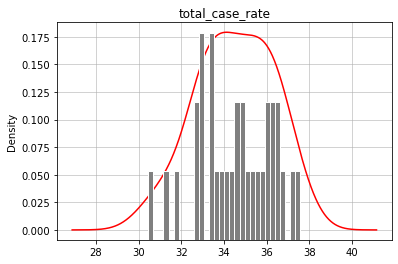

In [16]:
ax1 =boro_xy.total_case_rate.plot.kde(c='r')
ax2= ax1.twinx()
ax2 = boro_xy.total_case_rate.plot.hist(bins = 30,color='grey',edgecolor = "white")
ax2.axis('off')
ax1.grid(True,alpha=0.7)
plt.title('total_case_rate')

In [17]:
# Standardisation

In [18]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rs = RobustScaler(quantile_range=(10.0, 90.0))

In [19]:
normed = boro_xy.copy()
for c in boro_xy.columns.values:
    normed[c] = rs.fit_transform(boro_xy[c].values.reshape(-1,1))
    print("The range of {} is [{}, {}]".format(c, normed[c].min(), normed[c].max()))
normed.head()

The range of obesity(age18+) is [-0.6712447166589165, 0.8120840702603035]
The range of respiratory is [-0.890298358487599, 1.3149396137058358]
The range of coronary is [-1.0204260777104195, 0.6342550673267853]
The range of TB_incidence is [-0.41980447396896653, 1.237964564737028]
The range of Active is [-0.7440000000000008, 0.6533333333333334]
The range of Females is [-0.8859431172553301, 0.8308969230021038]
The range of Populationdensity is [-0.4967654150056098, 1.1142011410565513]
The range of housingprice is [-0.4844482040603849, 2.1574049973971876]
The range of income is [-0.48143914652732434, 1.1302525582408016]
The range of 65+(100%) is [-0.8272560630405772, 0.7425989881427547]
The range of All_persons is [-0.9092681658650722, 0.6986871181593657]
The range of total_cases is [-0.9189894453352428, 0.7400816507620218]
The range of ln_total_cases is [-1.263407174444686, 0.6166674299593726]
The range of total_cases2 is [-0.8357419564360108, 0.8084158760351664]
The range of covid0_60 i

,obesity(age18+),respiratory,coronary,TB_incidence,Active,Females,Populationdensity,housingprice,income,65+(100%),...,ln_total_cases,total_cases2,covid0_60,covid+60,total_case_rate,infection_tate(60-),infection_tate(60+),blue_dist,green_act,green_pas
Area_code,,,,,,,,,,,,,,,,,,,,,
E09000002,0.555392,1.314940,0.297679,0.253094,-0.520000,-0.119292,-0.035330,-0.484448,-0.415034,-0.424190,...,-0.504181,-0.496834,-0.434846,-0.342466,-0.488067,-0.516371,0.444441,-0.315923,0.004921,0.370272
E09000003,0.352910,-0.369788,-0.128922,-0.064590,-0.002667,0.007636,-0.223556,0.123308,-0.307261,0.319841,...,0.616667,0.614674,0.599846,0.984991,-0.146518,-0.017893,0.042839,0.661100,0.241142,0.198931
E09000004,0.561003,-0.039738,-0.064713,-0.259542,-0.493333,0.165943,-0.273448,-0.373829,-0.045450,0.608378,...,-0.190086,-0.140388,-0.274890,0.367687,-0.020208,0.213341,-0.141989,0.088180,0.388780,-0.248555
E09000005,0.040837,-0.521877,0.271686,0.775142,-0.317333,-0.319145,0.178917,0.035984,-0.195678,-0.041871,...,0.219411,0.134264,0.156107,0.424559,-0.842120,-0.709787,-0.014848,0.097478,0.004921,-0.055194
E09000006,0.168222,-0.186713,-0.355144,-0.419804,0.354667,0.216815,-0.496765,-0.120055,0.172817,0.742599,...,0.349646,0.419773,0.250227,0.848128,0.020208,0.371522,-0.759933,0.400898,0.359252,-0.040944


In [20]:
normed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, E09000002 to E09000033
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   obesity(age18+)      32 non-null     float64
 1   respiratory          32 non-null     float64
 2   coronary             32 non-null     float64
 3   TB_incidence         32 non-null     float64
 4   Active               32 non-null     float64
 5   Females              32 non-null     float64
 6   Populationdensity    32 non-null     float64
 7   housingprice         32 non-null     float64
 8   income               32 non-null     float64
 9   65+(100%)            32 non-null     float64
 10  All_persons          32 non-null     float64
 11  total_cases          32 non-null     float64
 12  ln_total_cases       32 non-null     float64
 13  total_cases2         32 non-null     float64
 14  covid0_60            32 non-null     float64
 15  covid+60             32 non-null

In [21]:
normed.drop(['ln_total_cases',"total_cases","green_pas","total_cases2","covid+60","covid0_60","total_case_rate","infection_tate(60-)"],axis=1, inplace=True)

In [22]:
#_ = seaborn.pairplot(db[cluster_variables], kind='reg', diag_kind='kde')

In [23]:
normed.drop(['All_persons'],axis=1, inplace=True)

In [24]:
#sns.set(style="white")
#sns.pairplot(boro_xy, markers=".", height=3,kind='reg', diag_kind='kde');

In [25]:
# correlation 

In [26]:
corr = normed.corr()
corr

,obesity(age18+),respiratory,coronary,TB_incidence,Active,Females,Populationdensity,housingprice,income,65+(100%),infection_tate(60+),blue_dist,green_act
obesity(age18+),1.000000,0.450026,0.318156,0.216311,-0.623864,-0.351120,-0.568799,-0.698852,-0.695859,0.271229,0.356285,0.361441,0.601927
respiratory,0.450026,1.000000,0.612379,0.190826,-0.201359,-0.318887,0.019552,-0.642878,-0.351639,-0.426630,0.457019,0.079253,-0.044008
coronary,0.318156,0.612379,1.000000,0.560676,-0.231342,-0.582088,0.191896,-0.643829,-0.452155,-0.558934,0.561245,0.003043,-0.206932
TB_incidence,0.216311,0.190826,0.560676,1.000000,-0.516232,-0.711356,0.045961,-0.283623,-0.451461,-0.368486,0.459142,0.018784,-0.056860
Active,-0.623864,-0.201359,-0.231342,-0.516232,1.000000,0.584480,0.469353,0.422718,0.636360,-0.254359,-0.381475,-0.161215,-0.426238
Females,-0.351120,-0.318887,-0.582088,-0.711356,0.584480,1.000000,0.132951,0.500413,0.436291,0.220261,-0.550096,0.072496,-0.034320
Populationdensity,-0.568799,0.019552,0.191896,0.045961,0.469353,0.132951,1.000000,0.460723,0.529561,-0.781416,-0.080078,-0.492485,-0.891855
housingprice,-0.698852,-0.642878,-0.643829,-0.283623,0.422718,0.500413,0.460723,1.000000,0.759505,-0.000945,-0.487557,-0.420017,-0.406638
income,-0.695859,-0.351639,-0.452155,-0.451461,0.636360,0.436291,0.529561,0.759505,1.000000,-0.108235,-0.290400,-0.436594,-0.427351
65+(100%),0.271229,-0.426630,-0.558934,-0.368486,-0.254359,0.220261,-0.781416,-0.000945,-0.108235,1.000000,-0.206787,0.361697,0.767718


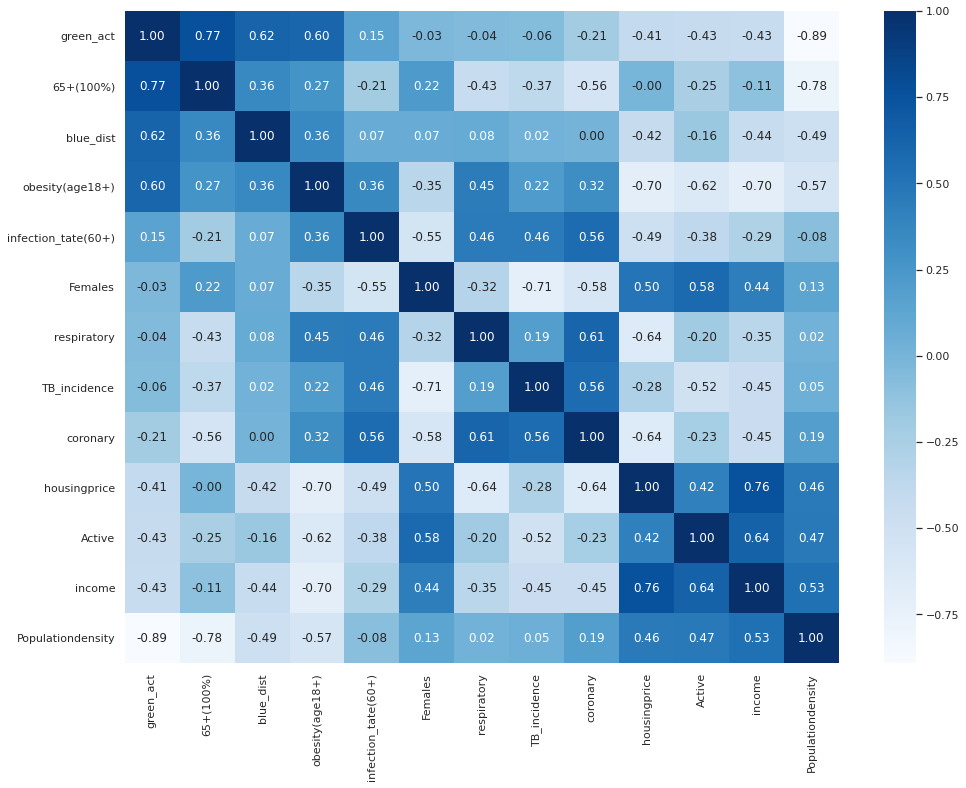

In [27]:
k=18
cols = corr.nlargest(k, "green_act")["green_act"].index
heat = np.corrcoef(normed[cols].values.T)
sns.set(font_scale=1.0)
plt.subplots(figsize=(16, 12))
hm = sns.heatmap(heat, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 12}, cmap = "Blues", yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [28]:
#normed.drop(['Active'],axis=1, inplace=True)

In [29]:
# regression 

In [30]:
### VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):

    while True:

        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        vif_df = vif_df.drop('const')
        

        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break

    return df

In [31]:
normed_new = drop_column_using_vif_(normed.drop("infection_tate(60+)", axis=1))

Dropping: Populationdensity
Dropping: housingprice
Dropping: 65+(100%)


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [32]:
regression = sm.OLS(endog=normed["infection_tate(60+)"],exog=sm.add_constant(normed_new)).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     infection_tate(60+)   R-squared:                       0.523
Model:                             OLS   Adj. R-squared:                  0.328
Method:                  Least Squares   F-statistic:                     2.680
Date:                 Mon, 08 Aug 2022   Prob (F-statistic):             0.0286
Time:                         14:51:13   Log-Likelihood:                -2.8586
No. Observations:                   32   AIC:                             25.72
Df Residuals:                       22   BIC:                             40.37
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0894      0.074     -1.201      0.242      -0.244       0.065
obesity(age18+)    -0.0828      0.281     -0.295      0.771      -0.666       0.500
respiratory         0.2044      0.179      1.141      0.266      -0.167       0.576
coronary            0.4824      0.278      1.735      0.097      -0.094       1.059
TB_incidence        0.1569      0.241      0.652      0.521      -0.342       0.656
Active             -0.1379      0.259     -0.533      0.599      -0.675       0.399
Females            -0.1572      0.237     -0.662      0.515      -0.650       0.335
income              0.3250      0.248      1.312      0.203      -0.189       0.839
blue_dist          -0.0542      0.210     -0.258      0.799      -0.489       0.381
green_act           0.4700      0.302      1.555      0.134      -0.157       1.097
==============================================================================
Omnibus:                        0.160   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.155
Skew:                          -0.133   Prob(JB):                        0.925
Kurtosis:                       2.787   Cond. No.                         7.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

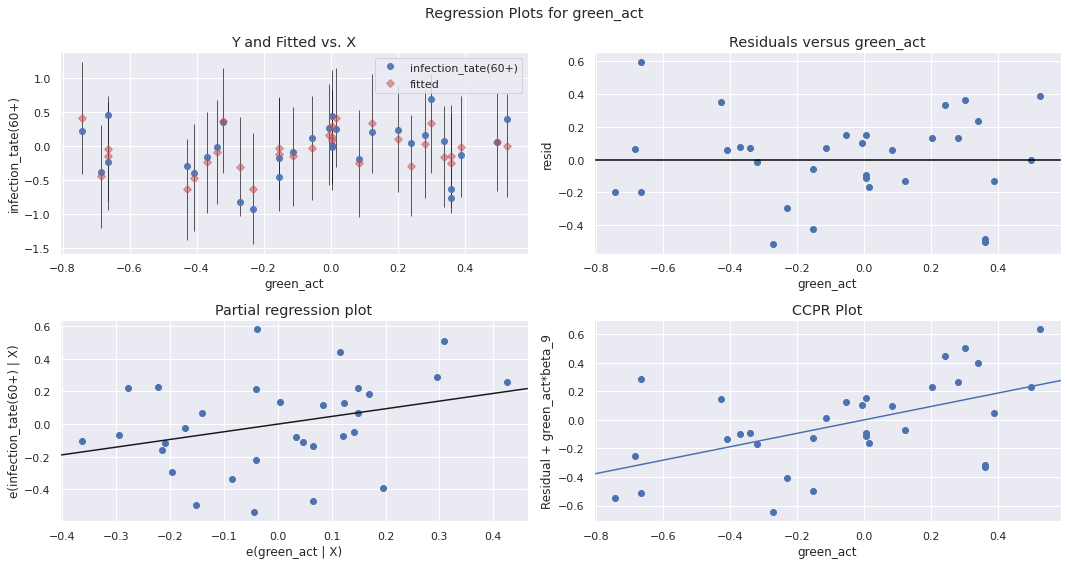

In [33]:
# residual analysis
sns.set()
import warnings # ignore warning
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(regression,"green_act", fig =fig)
#plt.savefig(os.path.join('img','3.png'))

In [34]:
# without consideing green factors

In [ ]:
#drop health factors


In [ ]:
# drop demographic factors 

In [ ]:
#'Age_under_14','Age_15_29','Age_30_44','Age_45_59','Age_60_74','Age_75+'

In [ ]:
#normed.drop(["All persons",'Age_under_14','Age_15_29','Age_30_44','Age_45_59','Age_60_74','Age_75+'],axis=1, inplace=True)

In [ ]:
#normed_new = drop_column_using_vif_(normed.drop('total_cases', axis=1))

In [ ]:
#regression = sm.OLS(endog=normed[['total_cases']],exog=sm.add_constant(normed_new)).fit()
#regression.summary()

In [ ]:
normed['predicted']=regression.predict()
normed['residuals']=normed.predicted-normed.total_cases

In [ ]:
normed = normed.reset_index()

In [ ]:
normed.head()

In [ ]:
#read london borough
boros = gpd.read_file('statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')

In [ ]:
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})
# buffer the boundary by 250m
ldn['geometry'] = ldn.original.buffer(250)
ldn = ldn.set_geometry('geometry')
ldn.plot();

In [1]:
#add green space with borough file
boro_fin = pd.merge(boros,normed,left_on='GSS_CODE', right_on ="Area_code", how='inner')
boro_fin.head()

NameError: name 'pd' is not defined

In [ ]:
boro_fin.drop(["NAME","GSS_CODE","HECTARES","NONLD_AREA","ONS_INNER","SUB_2009","SUB_2006"],axis=1, inplace=True)

In [ ]:
#boro_fin.drop(["blue_dist"],axis=1, inplace=True)

In [ ]:
boro_fin.head()

In [ ]:
boro_fin.info()

In [ ]:
boro_fin=boro_fin.set_index("Area_code", drop=True, append=False, inplace=False, verify_integrity=False)

In [ ]:
#normed_fin = drop_column_using_vif_(boro_fin.drop('total_cases', axis=1))

In [ ]:
#ols = spreg.OLS(y,x,w_queen,spat_diag=True,moran=True,name_y='ridership',name_x=list(var_3.columns),name_ds='DIDI_chengdu',name_w='queen')print(ols.summary)

In [ ]:
import spreg

In [ ]:
boro_fin.head()

In [ ]:
# calculate the moran'i of residual

In [ ]:
import esda
import pandas as pd
import geopandas as gpd
import seaborn as sns
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
from pylab import figure, scatter, show
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
wq = lps.weights.Queen.from_dataframe(boro_fin)
wq.transform = 'r' # 标准化矩阵
centroids = boro_fin.geometry.centroid # 计算多边形几何中心
wr = lps.weights.Rook.from_dataframe(boro_fin)# 使用Rook式邻接矩阵


In [ ]:
y = boro_fin["residuals"]
mi = esda.moran.Moran(y, wq)
print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)


In [ ]:
# 因变量
g_y = boro_fin['total_cases'].values.reshape((-1,1))
 
# 自变量
g_X = boro_fin[['green_act',"green_pas",'obesity(age18+)','respiratory','coronary',"TB_incidence","Active"]].values
 
"""# 坐标信息Latitude	Longitud
u = georgia_data['Longitud']
v = georgia_data['Latitude']
g_coords = list(zip(u,v))"""
 
# z标准化
#g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)
#g_y = g_y.reshape((-1,1))
#g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)